# Project: Wrangling and Analyze Data

## Data Gathering
Gathering all the necessary data that will be used for the analysis.

In [1]:
# Importing all the necessary libraries that will be needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import json

In [2]:
#loading the twitter-archive-enhanced data into the pandas
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#creating a folder to save the image predictions
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#create request to get data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Access the content and write to a file
with open (os.path.join(folder_name,url.split('/')[-1]),mode = 'wb' ) as file:
    file.write(response.content)

#to check the content of the folder
os.listdir(folder_name)

#loading image-predictions into pandas
image_prediction = pd.read_csv('image-predictions.tsv', sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

#Inputing the authentications code to access the data from WeRateDogs twitter account
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # Running a loop to get the informations needed
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#reading the data line by line
with open('tweet_json.txt', 'r') as json_file:
    data = []
    for line in json_file:
        lines = line.replace('\n',' ')
        data.append(lines)
line_length = len(data)
tweet_id = []
retweet_count =[]
favorite_count =[]
text  = {'tweet_id':[],'retweet_count':[],'favorite_count':[]}
for a in range(line_length):
    dicty = json.loads(data[a])
    tweet_id.append(dicty['id'])
    retweet_count.append(dicty['retweet_count'])
    favorite_count.append(dicty['favorite_count'])
text.update({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
#creating a pandas dataframe
twitter= pd.DataFrame(text)

## Assessing Data



## Accessing the Datasets
- Visually
- Programatically

### Visual access

In [5]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
twitter

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29331
2,891815181378084864,3481,22049
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### Programatic Access

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.duplicated().sum()

0

In [11]:
twitter_archive.name.to_markdown()
#from  assessing the data I found out some names were wrongly enteredb

'|      | name           |\n|-----:|:---------------|\n|    0 | Phineas        |\n|    1 | Tilly          |\n|    2 | Archie         |\n|    3 | Darla          |\n|    4 | Franklin       |\n|    5 | None           |\n|    6 | Jax            |\n|    7 | None           |\n|    8 | Zoey           |\n|    9 | Cassie         |\n|   10 | Koda           |\n|   11 | Bruno          |\n|   12 | None           |\n|   13 | Ted            |\n|   14 | Stuart         |\n|   15 | Oliver         |\n|   16 | Jim            |\n|   17 | Zeke           |\n|   18 | Ralphus        |\n|   19 | Canela         |\n|   20 | Gerald         |\n|   21 | Jeffrey        |\n|   22 | such           |\n|   23 | Canela         |\n|   24 | None           |\n|   25 | None           |\n|   26 | Maya           |\n|   27 | Mingus         |\n|   28 | Derek          |\n|   29 | Roscoe         |\n|   30 | None           |\n|   31 | Waffles        |\n|   32 | None           |\n|   33 | Jimbo          |\n|   34 | Maisey         |\n

In [12]:
twitter_archive.iloc[2204]
#from this it can be found that the name is Berta not an.

tweet_id                                                     668636665813057536
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-23 03:46:18 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Irish Rigatoni terrier named Berta....
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/668636665...
rating_numerator                                                             10
rating_denominator                                                           10
name                                    

In [15]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_prediction.duplicated().sum()

0

In [21]:
image_prediction.query('p1_conf>p2_conf>p3_conf')
#from this it shows that values from the p2 and p3 are not needed and therefore needs to be removed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
twitter.duplicated().sum()

0

### Quality issues
#### twitter_archive table
1. names in the name column that are 'a' ,'the','an','such','just','quite', 'None'  to NaN.

2. wrong datatypes (tweet_id, date).

3. removal of retweets and replies.

4. changing name from 'an' to 'Berta' located at index '2204'

5. removal of rows with name 'very' and 'getting' (they are not dogs as suggested by the text column).
#### twitter table
6. tweet_id in int not string

#### prediction table
7. tweet_id in int not string

8. convert dog_breed to lower case because of the irregularity in the case.

9. removal of false prediction from the p1_dog and removal of the p1_conf,p1_dog columns.

### Tidiness issues
1. Merge dog class in the `twitter_archive` table to one.

2. Merging `prediction` , `twitter_archive` and `twitter` to form `twitter_archive_master` table.

## Cleaning Data

In [149]:
# creating a copy of the orignal dataset
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
twitter_clean = twitter.copy()

### Issue #1:  Tidiness issues

#### Define: Merge the dog_class of the twitter_archive table to one column.

#### Code

In [150]:
#joining the different dog stages into a column named dog class
twitter_archive_clean['dog_class'] = twitter_archive_clean[['puppo','pupper','floofer','doggo']].apply(lambda x : ','.join(x.astype(str)),axis=1)
twitter_archive_clean['dog_class'] = twitter_archive_clean['dog_class'].str.replace('None,','')
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [115]:
#To check if the dog_stage column has been created and the other columns has been dropped
twitter_archive_clean.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Issue #2: Quality issues

#### Define  :

#### twitter_archive table
1. names in the name column that are 'a' ,'the','an','such','just','quite', 'None'  to NaN.

2. wrong datatypes (tweet_id, date).

3. removal of retweets and replies.

4. changing name from 'an' to 'Berta' located at index '2204'

5. removal of rows with name 'very' and 'getting' (they are not dogs as suggested by the text column).

#### Code :  changing the names that are wrong to NaN

In [151]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace( ['a','None','the','an','such','just','quite'],np.nan)

#### Test

In [140]:
#checking if the names that are 'a' and 'None' have been changed to NaN
print(twitter_archive_clean[twitter_archive_clean.name == 'a'])
twitter_archive_clean[twitter_archive_clean.name == 'None']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_class]
Index: []


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_class


 #### Code: wrong datatypes (tweet_id and date)

In [152]:
#changing the tweet_id data type to strings
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
#changing date to date time format
#extracting the date  from timestamp
twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].str.extract('(\d+-\d+-\d+)',expand=True)
#changing the date column type from a string to datetime type
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'])
#extracting the year from the date
twitter_archive_clean['year'] = twitter_archive_clean['date'].dt.year

#### Test

In [142]:
#checking if the datatypes have been changed
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   object        
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### Code:changing name from 'an' to 'Berta' located at index '2204'

In [153]:
twitter_archive_clean.loc[2204,'name'] = 'Berta'

#### Test

In [154]:
#checking for the change
twitter_archive_clean.iloc[2204]

tweet_id                                                     668636665813057536
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-23 03:46:18 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Irish Rigatoni terrier named Berta....
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/668636665...
rating_numerator                                                             10
rating_denominator                                                           10
name                                    

#### Code: removal of retweets and replies

In [155]:
#checking the rows that have retweets
df= twitter_archive_clean[twitter_archive_clean.retweeted_status_id > 1]
#getting the index number of the retweets
df.index
#using the index numbers to drop the rows that have retweets
twitter_archive_clean = twitter_archive_clean.drop(df.index,axis=0)
#checking the row that have replies
df_1 = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id >1]
#getting the index number of replies
df_1.index
#using the index of replies to drop the rows of replies
twitter_archive_clean = twitter_archive_clean.drop(df_1.index,axis=0)
#dropping the columns that are needed again
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','expanded_urls','rating_denominator'],axis = 1)

#### Test

In [156]:
#checking if the replies and retweets and other columns  have been removed
twitter_archive_clean

,tweet_id,text,rating_numerator,name,dog_class,date,year
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,2017-08-01,2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,Tilly,None,2017-08-01,2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,2017-07-31,2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,Darla,None,2017-07-30,2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,Franklin,None,2017-07-29,2017
...,...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,NaN,None,2015-11-16,2015
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,NaN,None,2015-11-16,2015
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,NaN,None,2015-11-15,2015
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,NaN,None,2015-11-15,2015


#### Code: removal of rows with name 'very' and 'getting' (they are not dogs as suggested by the text column).

In [159]:
value = ['very','getting']
#getting the index of the values
df_2 = twitter_archive_clean[twitter_archive_clean['name'].isin(value)].index
#removing them from the table
twitter_archive_clean = twitter_archive_clean.drop(df_2,axis=0)

#### Test

In [160]:
 twitter_archive_clean[twitter_archive_clean['name'].isin(value)]

,tweet_id,text,rating_numerator,name,dog_class,date,year


#### Define
twitter table;

tweet_id in int not string

#### Code

In [161]:
#changing the datatype of tweet_id to string
twitter_clean['tweet_id'] = twitter_clean.tweet_id.astype('str')

#### Test

In [162]:
#checking if the changes have be effected
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Define

prediction table;

tweet_id in int not string

convert dog_breed to lower case because of the irregularity in the case.

removal of false prediction from the p1_dog and the removal of the p1_conf, and p1_dog column.

#### Code

In [163]:
#  removal of the P2 and P3 columns because p1 has a higher prediction than them.
image_prediction_clean = image_prediction_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)
# changing the name of p1 to dog_breed
image_prediction_clean = image_prediction_clean.rename(columns= {'p1':'dog_breed'})
#changing the tweet_id to string type
image_prediction_clean['tweet_id'] = image_prediction_clean.tweet_id.astype('str')
#converting the dog_breed names to lowercase
image_prediction_clean['dog_breed'] = image_prediction_clean.dog_breed.str.lower()
#removing the rows that have false predictions
df= image_prediction_clean.query('p1_dog == False')
image_prediction_clean = image_prediction_clean.drop(df.index, axis =0)
#removal of the p1_conf and p1_dog columns
image_prediction_clean = image_prediction_clean.drop(['p1_conf','p1_dog'], axis=1)

#### Test

In [165]:
#checking the columns for the changes
image_prediction_clean

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua


In [166]:
#checking the datatype of tweet_id
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1532 non-null   object
 1   jpg_url    1532 non-null   object
 2   img_num    1532 non-null   int64 
 3   dog_breed  1532 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.8+ KB


In [167]:
#merging the tables to one dataset
#merging the twitter_archive_clean and the twitter_clean first to twitter_archive_1
twitter_archive_1= pd.merge(twitter_archive_clean,twitter_clean,on =['tweet_id'],how='left')
twitter_archive_1

,tweet_id,text,rating_numerator,name,dog_class,date,year,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,2017-08-01,2017,7009.0,33810.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,Tilly,None,2017-08-01,2017,5301.0,29331.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,2017-07-31,2017,3481.0,22049.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,Darla,None,2017-07-30,2017,7225.0,36937.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,Franklin,None,2017-07-29,2017,7760.0,35311.0
...,...,...,...,...,...,...,...,...,...
2086,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,NaN,None,2015-11-16,2015,37.0,89.0
2087,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,NaN,None,2015-11-16,2015,115.0,247.0
2088,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,NaN,None,2015-11-15,2015,36.0,100.0
2089,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,NaN,None,2015-11-15,2015,39.0,112.0


In [169]:
#merging the twitter_archive_1 and the image_prediction_clean to twitter_archive_master
twitter_archive_master = pd.merge(twitter_archive_1,image_prediction_clean,on = ['tweet_id'],how ='left')
twitter_archive_master

,tweet_id,text,rating_numerator,name,dog_class,date,year,retweet_count,favorite_count,jpg_url,img_num,dog_breed
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,2017-08-01,2017,7009.0,33810.0,NaN,NaN,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,Tilly,None,2017-08-01,2017,5301.0,29331.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,2017-07-31,2017,3481.0,22049.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,Darla,None,2017-07-30,2017,7225.0,36937.0,NaN,NaN,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,Franklin,None,2017-07-29,2017,7760.0,35311.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,NaN,None,2015-11-16,2015,37.0,89.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher
2087,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,NaN,None,2015-11-16,2015,115.0,247.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,rhodesian_ridgeback
2088,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,NaN,None,2015-11-15,2015,36.0,100.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,german_shepherd
2089,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,NaN,None,2015-11-15,2015,39.0,112.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [170]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data


### Insights:
1. What are the top ten dog breed that have the highest ratings?

2. What are the top ten dog breed that are the most favorite?

3. What are the top ten dog breed that have the highest retweet counts?

4. What is the general trend of the WeRateDog page over the years?

### Visualization

1. What is the relationship with the favorite count and retweet count?


In [171]:
#importing the master dataset
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [172]:
#Defining a function that will be used to produce the top 10 for all the insights
def top_func(anl,colname='dog_breed',top_x=10):
    if anl == 'rd':
        aggcol = 'rating_numerator'
        agg = 'mean'
    elif anl == 'fc':
        aggcol = 'favorite_count'
        agg = 'mean'
    elif anl == 'rc':
        aggcol = 'retweet_count'
        agg = 'mean'
    else:
        print('You have inputed the wrong anl,please inpute either "rd","fc","rc"')
    return twitter_archive_master.groupby(by=colname).agg({aggcol:agg}).sort_values(by=aggcol,ascending=False)[0:top_x]

### Insight 1: What are the top ten dog breed that have the highest ratings?

In [173]:
#using the function defined above.
top_func('rd')

,rating_numerator
dog_breed,
clumber,27.000000
soft-coated_wheaten_terrier,26.700000
west_highland_white_terrier,15.642857
great_pyrenees,15.230769
borzoi,14.625000
labrador_retriever,14.032609
siberian_husky,13.250000
pomeranian,12.868421
saluki,12.500000


### Insight 2: What are the top ten dog breed that are the most favorite?

In [174]:
#Applying the function above
top_func('fc')

,favorite_count
dog_breed,
saluki,20803.000000
french_bulldog,16349.800000
afghan_hound,14709.333333
black-and-tan_coonhound,14670.000000
giant_schnauzer,14659.000000
flat-coated_retriever,14522.125000
irish_water_spaniel,13979.666667
standard_poodle,13633.000000
english_springer,13449.888889


### Insight 3: What are the top ten dog breed that have the highest retweet counts?

In [175]:
#From the function above
top_func('rc')

,retweet_count
dog_breed,
standard_poodle,5413.857143
english_springer,4872.444444
afghan_hound,4786.666667
eskimo_dog,4413.611111
saluki,4135.000000
giant_schnauzer,4130.000000
french_bulldog,3925.520000
lakeland_terrier,3848.600000
flat-coated_retriever,3728.000000


#### Comment
We can see from the three insights that the saluki appeared in them, which show the people's love for the dog.

### Insight 4: What is the general trend of the WeRateDog page over the years?

In [186]:
#creating a groupby year to find out the increase in activity of the WeRateDog twitter page 
twitter_archive_master.groupby(by='year').mean({'favorite_count':'mean'}).sort_values(by='favorite_count',ascending = False)

,tweet_id,rating_numerator,retweet_count,favorite_count,img_num
year,,,,,
2017,8.506534e+17,12.600000,4833.614555,20722.061995,1.386760
2016,7.363913e+17,13.298664,2307.688995,6748.373206,1.238482
2015,6.728165e+17,10.239521,887.530735,2187.929535,1.055427


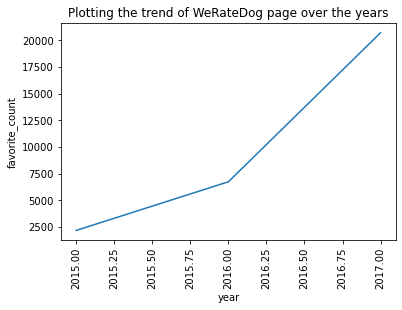

In [188]:
#visualizing the trend on a line graph based on year and favorite_count
twitter_archive_master.groupby(by='year')['favorite_count'].mean().plot(kind='line')
plt.xticks(rotation =90)
plt.ylabel('favorite_count')
plt.title('Plotting the trend of WeRateDog page over the years');

#### Comment
From the graph it can be seen that WeRateDog page has been increasing in activities over the years.

### Visualization 1: What is the relationship with the favorite count and retweet count?

In [190]:
value = ['retweet_count','favorite_count']
twitter_archive_master[value].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.925912
favorite_count,0.925912,1.000000


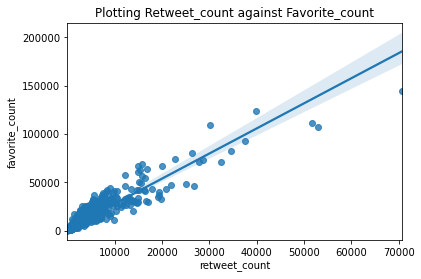

In [191]:
#plotting a scatter plot to depict the relationship between favorite count and retweet count
sb.regplot(data=twitter_archive_master,x='retweet_count',y='favorite_count')
plt.title('Plotting Retweet_count against Favorite_count')
plt.show()

#### Comment
From the statistics and the graph we can see that retweet_count and favoite_count is highly correlated